## Evaluate Performance for 1D bosonic RNN with and without $S_z^{tot}=0$

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as colors
import matplotlib.cm as cmx
params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 14,
    "figure.figsize": (6, 4),
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "lines.linewidth": 2,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 5,
    "lines.marker": "o",
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")

print(os.environ["PATH"])
os.environ["PATH"] += os.pathsep + '/opt/local/bin'
print(os.getenv("PATH"))

cm = plt.get_cmap('tab10') 
values = range(8)
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
sm = cmx.ScalarMappable(norm=cNorm, cmap=cm)


def load(sztot, folders):
    # load target observables
    target_obs = {}
    for obs in ["sxsx", "sysy", "szsz"]:
        target_obs[obs] = []
        for folder in folders:
            with open(sztot+folder+"target_"+obs+".txt") as f:
                target_obs[obs].append([float(item) for item in f.readlines()])


    # load observables from RNN reconstruction
    rnn_obs = {}
    for obs in ["sxsx", "sysy", "szsz"]:
        rnn_obs[obs] = []
        for folder in folders:
            rnn_obs[obs].append(np.load(sztot+folder+obs+".npy"))
    return target_obs, rnn_obs

def plot(folders, rnn_obs, target_obs):
    # plot
    fig, ax = plt.subplots(1,3, figsize=(13,4))
    for o, obs in enumerate(["sxsx", "sysy", "szsz"]):
        for f, folder in enumerate(folders):
            ax[o].plot(target_obs[obs][f], color = sm.to_rgba(f))
            ax[o].plot(rnn_obs[obs][f], color = sm.to_rgba(f), linestyle="dotted", marker="x")
            ax[o].plot([],[], color = sm.to_rgba(f), label = "$\Delta=$ "+folder.split("/")[0].split("=")[1])
        ax[o].legend(title=obs, title_fontsize=16, loc="upper right")
    plt.show()

/Users/hannah.lange/opt/anaconda3/bin:/Users/hannah.lange/opt/anaconda3/condabin:/opt/local/bin:/opt/local/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/munki:/opt/local/bin:/opt/local/bin
/Users/hannah.lange/opt/anaconda3/bin:/Users/hannah.lange/opt/anaconda3/condabin:/opt/local/bin:/opt/local/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/munki:/opt/local/bin:/opt/local/bin:/opt/local/bin


## 8 qubits ($S_z^{tot}=0$)
### Without constraint on Sz

In [23]:
folders = ["Delta=0/", "Delta=1/", "Delta=5/"]
target, rnn = load("8_qubits/without_total_sz=0/",folders)

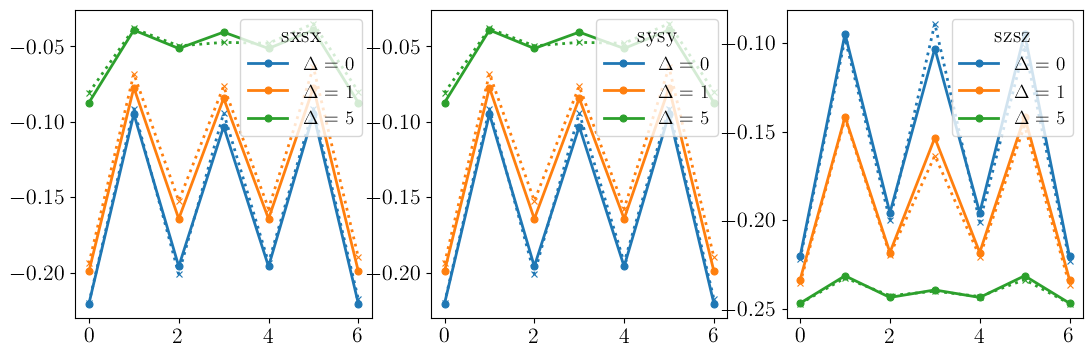

In [24]:
plot(folders, rnn, target)

but for $\Delta = -1$ and $\Delta = -0.5$:

In [25]:
folders = ["Delta=-0.5/", "Delta=-1/"]
target, rnn = load("8_qubits/without_total_sz=0/", folders)

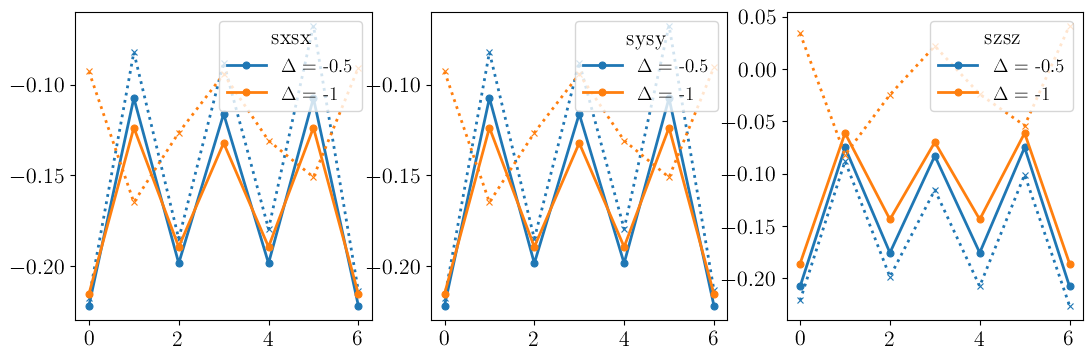

In [26]:
plot(folders, rnn, target)

### With constraint on Sz as in Hibat-Allah 2020

In [27]:
folders = ["Delta=0/", "Delta=-0.5/", "Delta=-1/"]
target, rnn = load("8_qubits/with_total_sz_HibatAllah/", folders)
eloc = np.load("8_qubits/with_total_sz_HibatAllah/Delta=-1/Eloc.npy")
print("The Delta=-1 state with enforced Sz=0 has energy "+str(np.real(eloc[-1])))
eloc = np.load("8_qubits/without_total_sz=0/Delta=-1/Eloc.npy")
print("Compared to the Delta=-1 state without enforced Sz=0 (ends with Sz_tot=-1) which has energy "+str(np.real(eloc[-1]))+". Sometimes it also ends at lower energy -2.37 --> the former one is just a local minimum?")
print("Compared to the Delta=-1 state from DMRG which has energy -2.3793852415718204")

The Delta=-1 state with enforced Sz=0 has energy -2.379322
Compared to the Delta=-1 state without enforced Sz=0 (ends with Sz_tot=-1) which has energy -1.6993653. Sometimes it also ends at lower energy -2.37 --> the former one is just a local minimum?
Compared to the Delta=-1 state from DMRG which has energy -2.3793852415718204


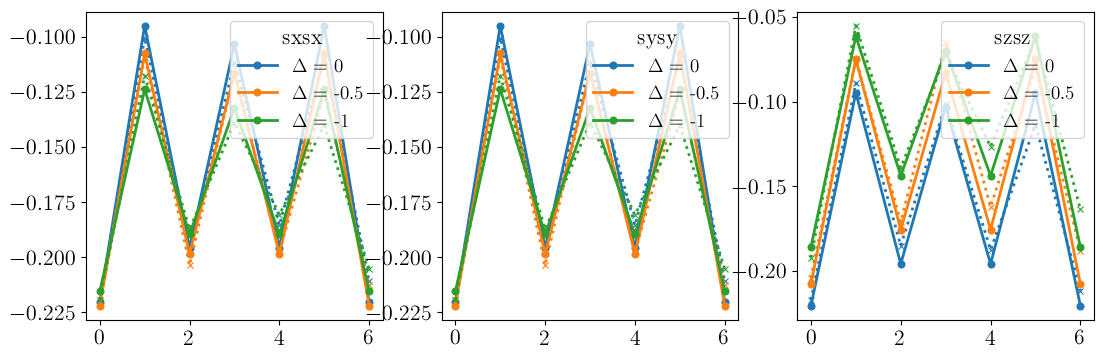

In [28]:
plot(folders, rnn, target)

- Energien mit DMRG vergleichen
- chain mit Sz!=0
- Zeit messen für grosse Systeme

### With constraint on Sz via cost function

In [29]:
folders = ["Delta=-1/"]
target, rnn = load("8_qubits/with_total_sz_cost/", folders)
eloc = np.load("8_qubits/with_total_sz_cost/Delta=-1/Eloc.npy")
print("The Delta=-1 state with enforced Sz=0 has energy "+str(np.real(eloc)))
eloc = np.load("8_qubits/without_total_sz=0/Delta=-1/Eloc.npy")
print("Compared to the Delta=-1 state without enforced Sz=0 (ends with Sz_tot=-1) which has energy "+str(np.real(eloc[-1]))+". Sometimes it also ends at lower energy -2.37 --> the former one is just a local minimum?")
print("Compared to the Delta=-1 state from DMRG which has energy -2.3793852415718204")

The Delta=-1 state with enforced Sz=0 has energy -2.3807557
Compared to the Delta=-1 state without enforced Sz=0 (ends with Sz_tot=-1) which has energy -1.6993653. Sometimes it also ends at lower energy -2.37 --> the former one is just a local minimum?
Compared to the Delta=-1 state from DMRG which has energy -2.3793852415718204


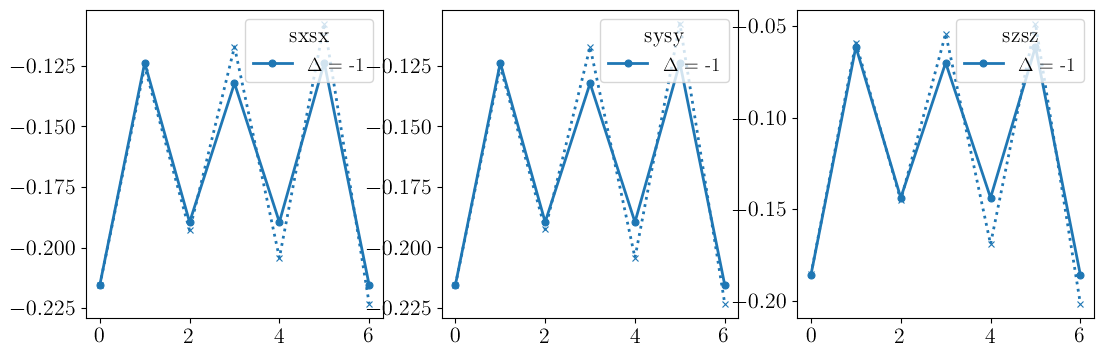

In [30]:
plot(folders, rnn, target)

### 9 qubits ($S_z^{tot}=0.5$)

In [31]:
folders = ["Delta=-1/"]
def load(size, sztot, folders):
    # load target observables
    target_obs = {}
    for obs in ["sxsx", "sysy", "szsz"]:
        target_obs[obs] = []
        for folder in folders:
            target_obs[obs].append(np.load(str(size)+"_qubits/"+"without_total_sz=0.5/"+folder+"target_"+obs+".npy"))
            #print(np.load(str(size)+"_qubits/"+"without_total_sz=0.5/"+folder+"target_"+obs+".npy"))


    # load observables from RNN reconstruction
    rnn_obs = {}
    for obs in ["sxsx", "sysy", "szsz"]:
        rnn_obs[obs] = []
        for folder in folders:
            rnn_obs[obs].append(np.load(str(size)+"_qubits/"+sztot+folder+obs+".npy"))
    return target_obs, rnn_obs

target, rnn = load(9, "/with_total_sz_cost/", folders)
target1, rnn1 = load(9, "with_total_sz_HibatAllah/", folders)
target2, rnn2 = load(9, "/without_total_sz=0.5/", folders)
eloc = np.load("9_qubits/with_total_sz_cost/Delta=-1/Eloc.npy")
print("The Delta=-1 state with enforced Sz=0.5 has energy "+str(np.real(eloc)))
eloc = np.load("9_qubits/with_total_sz_HibatAllah/Delta=-1/Eloc.npy")
print("The Delta=-1 state with enforced Sz=0.5 (as in Hibat Allab 2020) has energy "+str(np.real(eloc)))
eloc = np.load("9_qubits/without_total_sz=0.5/Delta=-1/Eloc.npy")
print("Compared to the Delta=-1 state without enforced Sz=0.5 (ends with Sz_tot=2.5) which has energy "+str(np.real(eloc)))
print("Compared to the Delta=-1 state from DMRG which has energy -2.6568757573375237")

The Delta=-1 state with enforced Sz=0.5 has energy -2.648959
The Delta=-1 state with enforced Sz=0.5 (as in Hibat Allab 2020) has energy -2.6407573
Compared to the Delta=-1 state without enforced Sz=0.5 (ends with Sz_tot=2.5) which has energy -1.7514997
Compared to the Delta=-1 state from DMRG which has energy -2.6568757573375237


/Users/hannah.lange/opt/anaconda3/envs/ML_environment/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


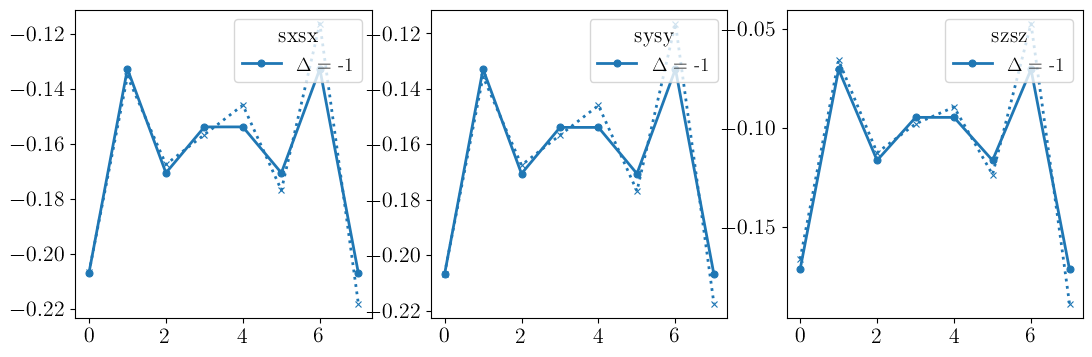

In [32]:
# Enforce Sz=0 via cost
plot(folders, rnn, target)

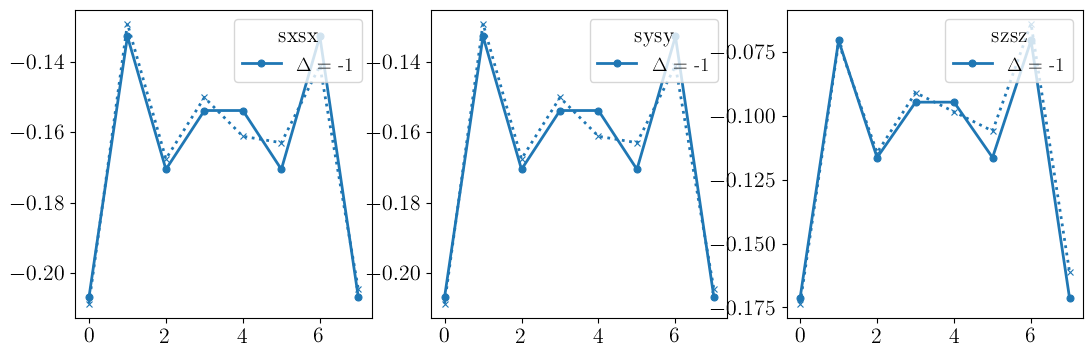

In [33]:
# Enforce Sz=0 as in Hibat Allah 2020
plot(folders, rnn1, target1)

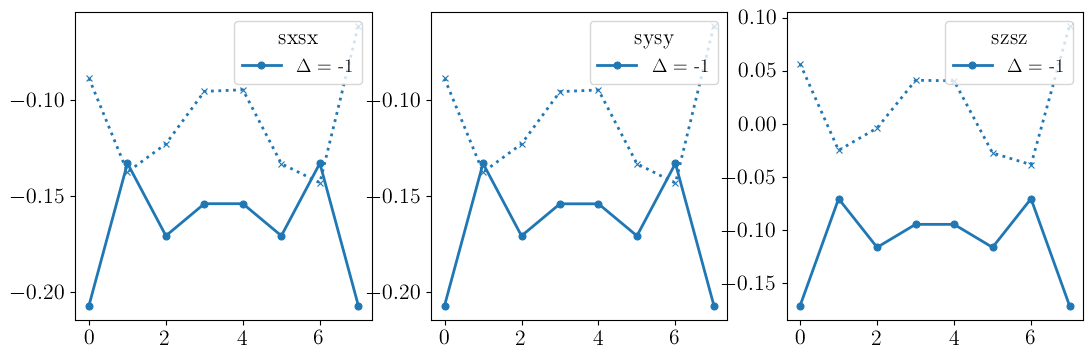

In [34]:
# Dont enforce Sz=0 
plot(folders, rnn2, target2)

## Large Systems 
we use the implementation with Sz conservation via the cost function

In [35]:
folders = ["Delta=-1/", "Delta=0/"]
def load(size, sztot, folders):
    # load target observables
    target_obs = {}
    for obs in ["sxsx", "sysy", "szsz"]:
        target_obs[obs] = []
        for folder in folders:
            target_obs[obs].append(np.load(str(size)+"_qubits/"+folder+"target_"+obs+".npy"))
            #print(np.load(str(size)+"_qubits/"+"without_total_sz=0.5/"+folder+"target_"+obs+".npy"))


    # load observables from RNN reconstruction
    rnn_obs = {}
    for obs in ["sxsx", "sysy", "szsz"]:
        rnn_obs[obs] = []
        for folder in folders:
            rnn_obs[obs].append(np.load(str(size)+"_qubits/"+sztot+folder+obs+".npy"))
    return target_obs, rnn_obs

target, rnn = load(50, "/with_total_sz_cost/", folders)
for folder in folders:
    eloc = np.load("50_qubits/with_total_sz_cost/"+folder+"/Eloc.npy")
    print("The Delta=-1 state with enforced Sz=0.5 has energy "+str(np.real(eloc)))
    e = np.load("50_qubits/"+folder+"/E.npy")
    print("Compared to the Delta=-1 state from DMRG which has energy "+str(np.real(e)))
    print("-------")

The Delta=-1 state with enforced Sz=0.5 has energy -14.803368
Compared to the Delta=-1 state from DMRG which has energy -15.736371139985113
-------
The Delta=-1 state with enforced Sz=0.5 has energy -21.786388
Compared to the Delta=-1 state from DMRG which has energy -21.972110281009712
-------


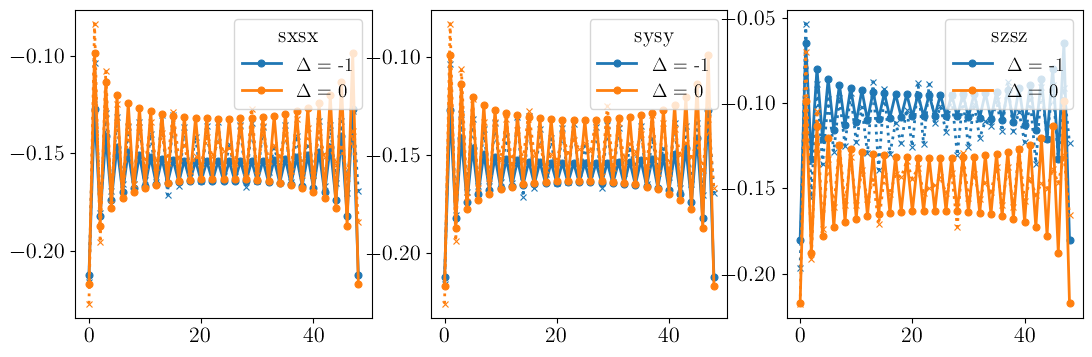

In [36]:
plot(folders, rnn, target)